# Video Game Sentiment Analysis

In [1]:
# Importing necessary libraries for the project
# Utilities
import re  
import numpy as np  
import pandas as pd  
import pickle

# Data Visualization
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# Plotting
import seaborn as sns  
from wordcloud import WordCloud  

# Natural Language Toolkit
from nltk.stem import SnowballStemmer  
from nltk.stem import WordNetLemmatizer  

# Machine Learning
from sklearn.svm import LinearSVC  
from sklearn.naive_bayes import BernoulliNB  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  

# Set log
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
# Read the user_data file
user_data = pd.read_json('Video_Games.json', lines=True)

user_data.head()   

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN
1,3,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN
2,4,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN
3,1,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN
4,4,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

In [3]:
user_data.shape

(2565349, 12)

In [4]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565349 entries, 0 to 2565348
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   reviewerName    object
 6   reviewText      object
 7   summary         object
 8   unixReviewTime  int64 
 9   vote            object
 10  style           object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 217.7+ MB


In [5]:
# Define a function to get the sentiment label based on the overall rating
def get_sentiment_label(rating):
    if rating > 3.0:
        return "POSITIVE"
    elif rating < 3.0:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

# Add a new column to the DataFrame to set the sentiment based on the overall rating
user_data["sentiment"] = user_data["overall"].apply(get_sentiment_label)

user_data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,sentiment
0,1,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,NaN,NaN,NaN,NEGATIVE
1,3,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,NaN,NaN,NaN,NEUTRAL
2,4,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15,NaN,NaN,POSITIVE
3,1,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11,NaN,NaN,NEGATIVE
4,4,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,NaN,NaN,NaN,POSITIVE


In [6]:
# Select only the "review" and "Sentiment" columns
user_data = user_data[["reviewText", "sentiment"]]

user_data.head()

,reviewText,sentiment
0,I used to play this game years ago and loved i...,NEGATIVE
1,The game itself worked great but the story lin...,NEUTRAL
2,I had to learn the hard way after ordering thi...,POSITIVE
3,The product description should state this clea...,NEGATIVE
4,I would recommend this learning game for anyon...,POSITIVE


In [7]:
# Check for null values
user_data.isnull().sum()

reviewText    1715
sentiment        0
dtype: int64

In [8]:
# Check for empty strings
user_data[user_data["reviewText"] == ""]

,reviewText,sentiment


In [9]:
user_data.dropna(inplace=True)

In [10]:
# Group the data by sentiment and count the number of occurrences
sentiment_counts = user_data.groupby("sentiment").size().reset_index(name="Count")

# Create a bar chart of the sentiment counts using plotly.express
fig = px.bar(sentiment_counts, x="sentiment", y="Count", color="sentiment",
             labels={"Sentiment": "Sentiment", "Count": "Count"},
             title="Sentiment Counts")
fig.show()

In [11]:
# print the user_data shape and count of sentiment
print("Shape of dataset: ", user_data.shape)
print(user_data["sentiment"].value_counts())


Shape of dataset:  (2563634, 2)
sentiment
POSITIVE    1898218
NEGATIVE     453114
NEUTRAL      212302
Name: count, dtype: int64


In [12]:
user_data.head()

,reviewText,sentiment
0,I used to play this game years ago and loved i...,NEGATIVE
1,The game itself worked great but the story lin...,NEUTRAL
2,I had to learn the hard way after ordering thi...,POSITIVE
3,The product description should state this clea...,NEGATIVE
4,I would recommend this learning game for anyon...,POSITIVE


## Preprocessing
I think 400k data each is pretty big, so let's drop some positive and all the neutral sentiment.

In [13]:
# Count the number of POSITIVE and NEGATIVE sentiment reviews
num_pos = len(user_data[user_data['sentiment'] == 'POSITIVE'])
num_neg = len(user_data[user_data['sentiment'] == 'NEGATIVE'])

# If there are more POSITIVE reviews than NEGATIVE reviews, drop the excess POSITIVE reviews
if num_pos > num_neg:
    excess_pos = num_pos - num_neg
    pos_indices = user_data[user_data['sentiment'] == 'POSITIVE'].index[:excess_pos]
    user_data.drop(pos_indices, inplace=True)

# If there are more NEGATIVE reviews than POSITIVE reviews, drop the excess NEGATIVE reviews
elif num_neg > num_pos:
    excess_neg = num_neg - num_pos
    neg_indices = user_data[user_data['sentiment'] == 'NEGATIVE'].index[:excess_neg]
    user_data.drop(neg_indices, inplace=True)

# drop neutral reviews
user_data.drop(user_data[user_data['sentiment'] == 'NEUTRAL'].index, inplace=True)

In [14]:
fig = px.bar(user_data.groupby("sentiment").size().reset_index(name="Count"), x="sentiment", y="Count", color="sentiment",
                labels={"Sentiment": "Sentiment", "Count": "Count"},
                title="Sentiment Counts")
fig.show()

In [15]:
# save csv
user_data.to_csv('user_data.csv', index=False)

## Checkpoint

In [33]:
user_data = pd.read_csv('user_data.csv')

In [34]:
# Store data in lists
text, sentiment = list(user_data["reviewText"]), list(user_data["sentiment"])

## Text Cleaning

In [35]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [36]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [37]:
%%time
user_data['reviewText'] = user_data['reviewText'].apply(lambda x: preprocess(x))

CPU times: total: 1min 18s
Wall time: 1min 29s


In [38]:
import matplotlib.pyplot as plt

def wordcloud_maker(data, title=None, max_words=1000, width=1600, height=800, collocations=False):
    # Create a WordCloud object with the specified parameters
    wordcloud = WordCloud(width=width, 
                          height=height, 
                          max_words=max_words, 
                          background_color="white", 
                          stopwords=stop_words, 
                          min_font_size=10, 
                          collocations=collocations).generate(str(data))
    
    # Plot the WordCloud image                        
    plt.figure(figsize=(20, 20), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title, fontsize=20)
    plt.show()

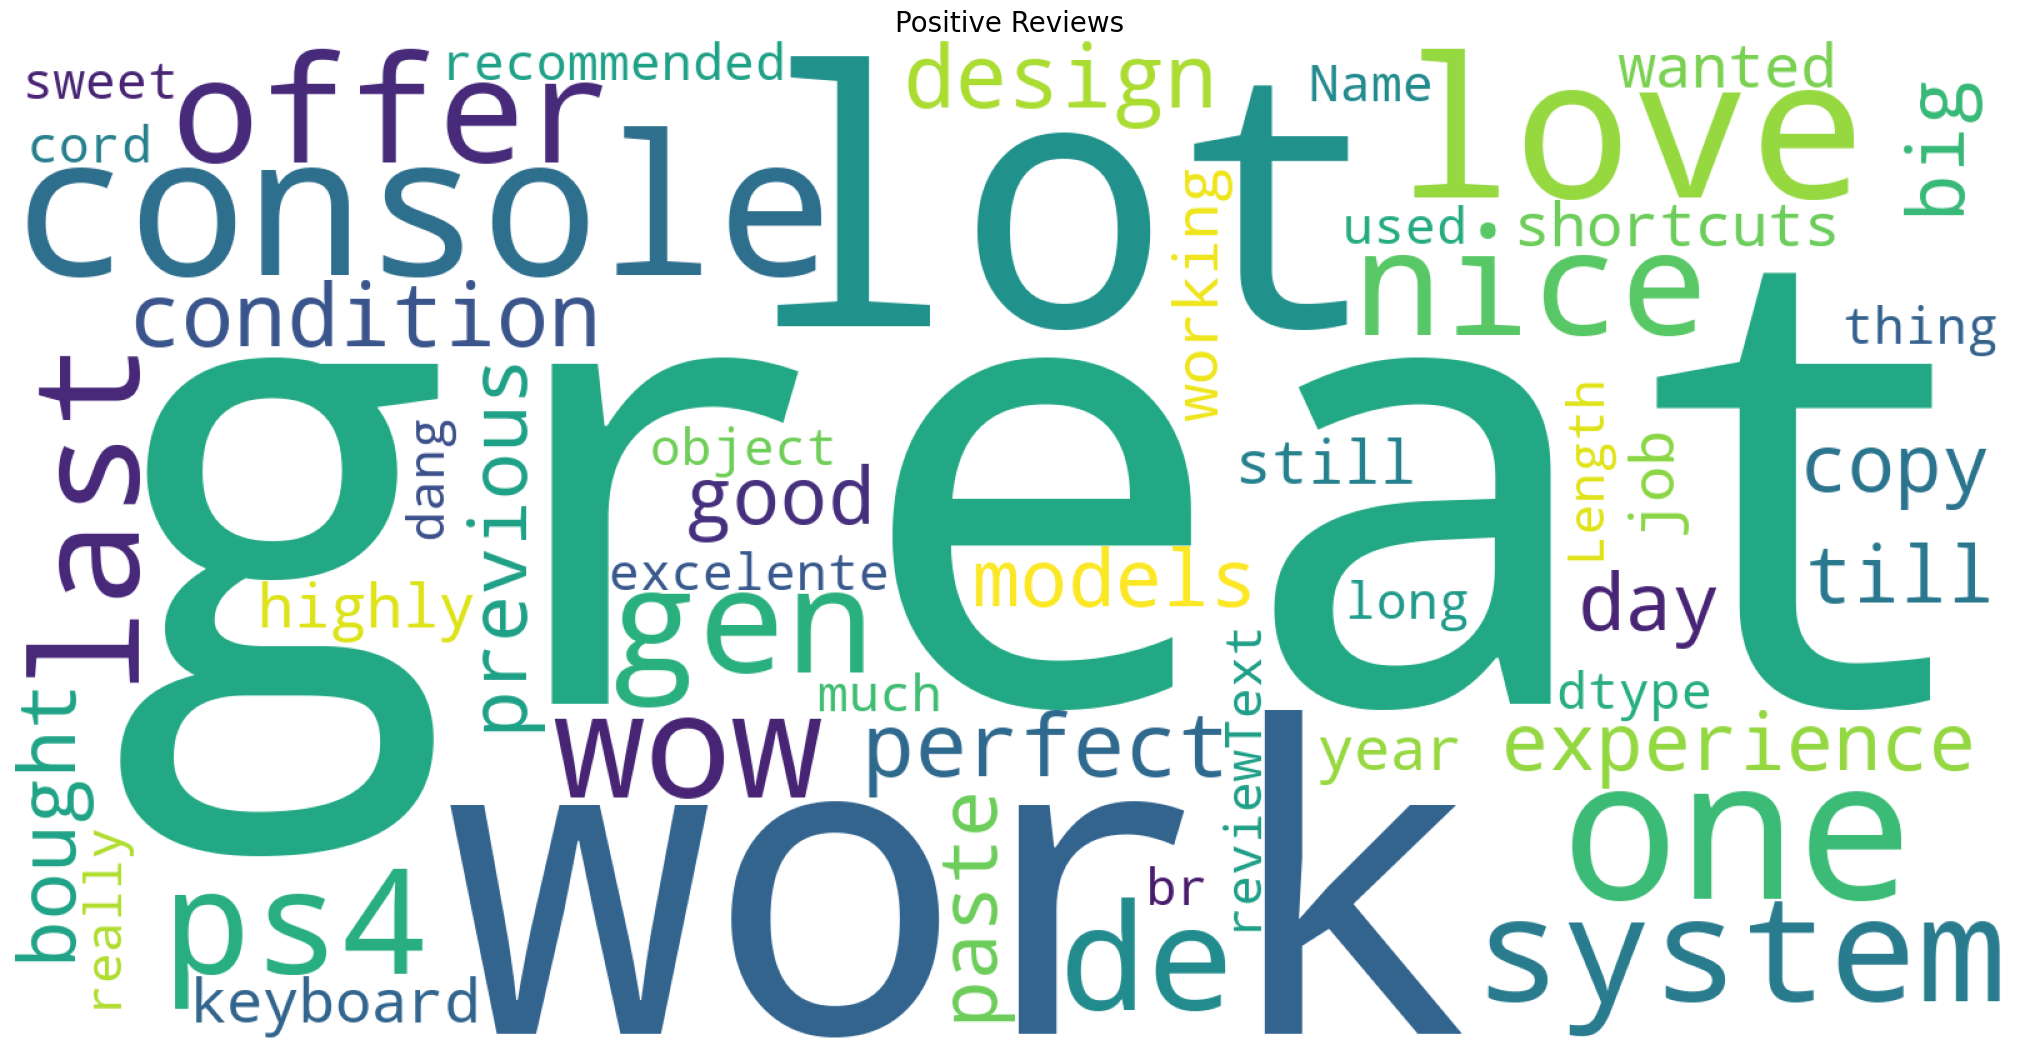

In [39]:
# Create a WordCloud image of the positive reviews
wordcloud_maker(user_data[user_data["sentiment"] == "POSITIVE"]["reviewText"], title="Positive Reviews")

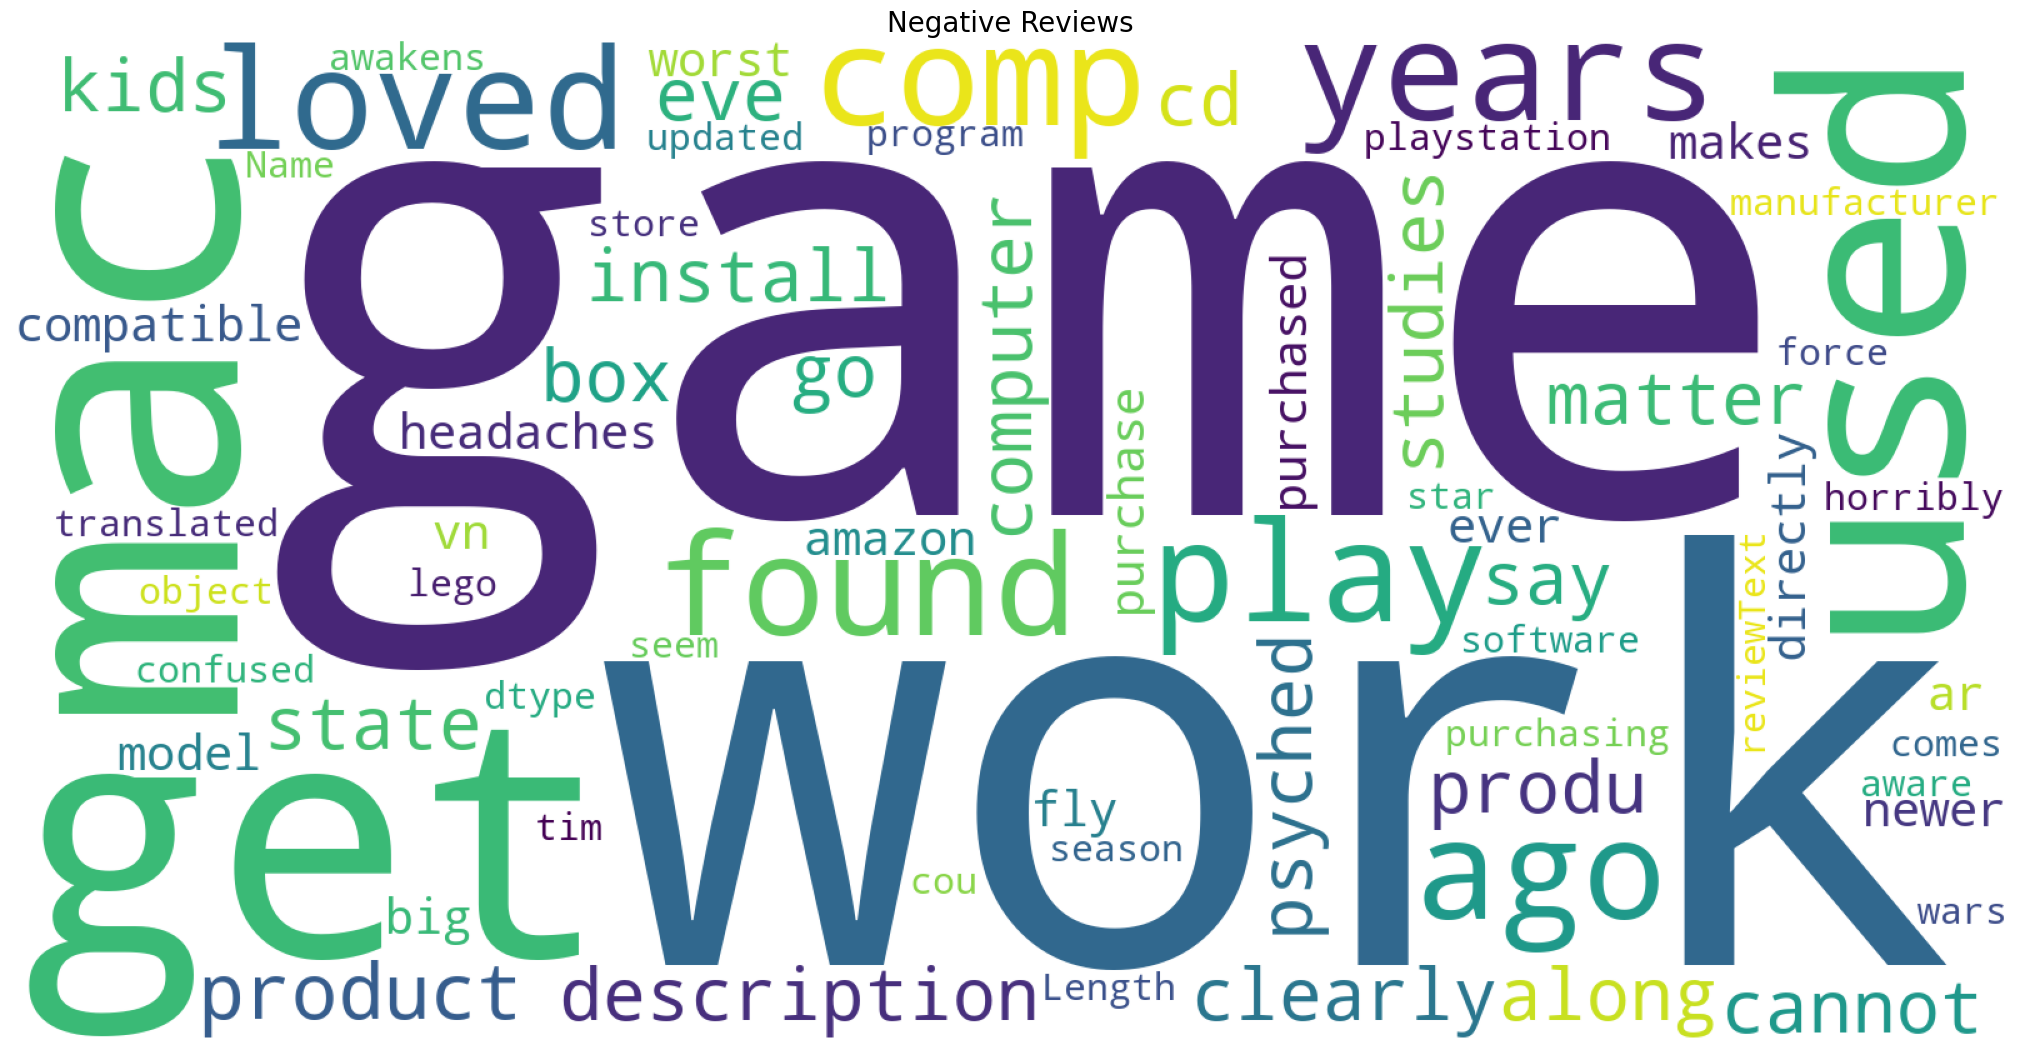

In [40]:
# Create a WordCloud image of the negative reviews
wordcloud_maker(user_data[user_data["sentiment"] == "NEGATIVE"]["reviewText"], title="Negative Reviews")

## Splitting Data

In [41]:
X = user_data["reviewText"]
y = user_data["sentiment"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Vectorizer

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data
X_train = vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test = vectorizer.transform(X_test)


# Save the vectorizer
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

## Model Building

In [43]:
def model_train_evaluate(model, X_train, y_train, X_test, y_test, model_name):

    model.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset
    print(classification_report(y_test, y_pred))
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["POSITIVE",  "NEGATIVE"])
    group_names = ["True Positive", "False Positive", 
                   "False Negative", "True Negative"]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    ax = plt.subplot()
    sns.heatmap(cm/cm.sum(axis=1)[:, np.newaxis], annot=labels, ax=ax, cmap="Blues", fmt="")
    
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.xaxis.set_ticklabels(["POSITIVE",  "NEGATIVE"])
    ax.yaxis.set_ticklabels(["POSITIVE",  "NEGATIVE"])
    
    plt.show()

    # save the model with the 'model' name
    with open(f"{model_name}.pkl", 'wb') as f:
        pickle.dump(model, f)

### SVM

              precision    recall  f1-score   support

    NEGATIVE       0.91      0.91      0.91     90557
    POSITIVE       0.91      0.91      0.91     90689

    accuracy                           0.91    181246
   macro avg       0.91      0.91      0.91    181246
weighted avg       0.91      0.91      0.91    181246



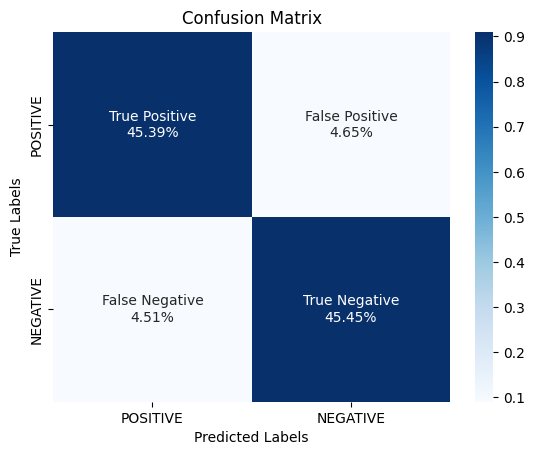

In [44]:
# Create a LinearSVC model
svm = LinearSVC()

# Train and evaluate the model
model_train_evaluate(svm, X_train, y_train, X_test, y_test, "svm")

### Naive Bayes

              precision    recall  f1-score   support

    NEGATIVE       0.79      0.50      0.62     90557
    POSITIVE       0.64      0.87      0.73     90689

    accuracy                           0.69    181246
   macro avg       0.71      0.69      0.67    181246
weighted avg       0.71      0.69      0.67    181246



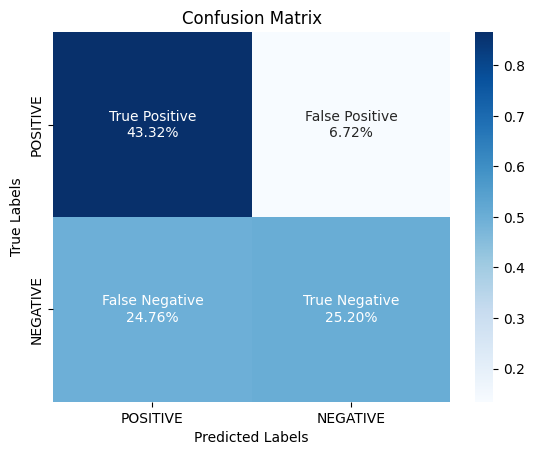

In [45]:
from sklearn.naive_bayes import BernoulliNB

# Create a MultinomialNB model
nb = BernoulliNB()

# Evaluate the model
model_train_evaluate(nb, X_train, y_train, X_test, y_test, "nb")

### Logistic Regression

              precision    recall  f1-score   support

    NEGATIVE       0.91      0.91      0.91     90557
    POSITIVE       0.91      0.91      0.91     90689

    accuracy                           0.91    181246
   macro avg       0.91      0.91      0.91    181246
weighted avg       0.91      0.91      0.91    181246



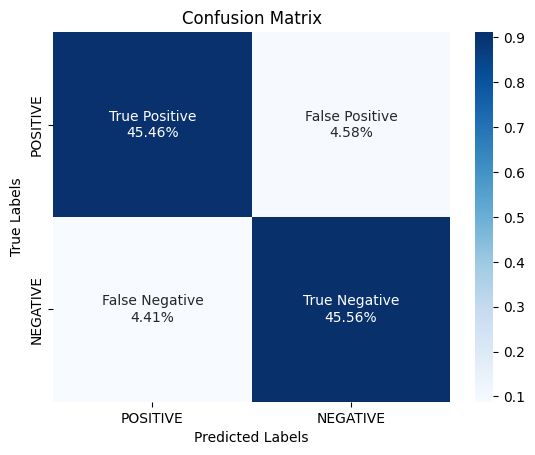

In [46]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
lr = LogisticRegression(solver='saga')

# Evaluate the model
model_train_evaluate(lr, X_train, y_train, X_test, y_test, "lr")

### GridSearchCV

You can use this to find the best parameters. I don't use it because it takes too long on my CPU.

In [47]:
# from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression

# def find_best_model_using_gridsearchcv(x, y):
#     algos = {
#         'svm': {
#             'model': SVC(),
#             'params': {
#                 'C': [0.1, 1],
#                 'kernel': ['linear', 'rbf']
#             }
#         },
#         'multinomial_nb': {
#             'model': MultinomialNB(),
#             'params': {
#                 'alpha': [0.1, 1.0],
#             }
#         },
#         'logistic_regression': {
#             'model': LogisticRegression(),
#             'params': {
#                 'C': [0.1, 1],
#                 'penalty': ['l1', 'l2'],
#             }
#         }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=2, test_size=0.3, random_state=0)

#     for algo_name, config in algos.items():
#         gs = RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=3, random_state=0, n_jobs=-1, return_train_score=False)
#         gs.fit(x, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_,
#             'best_model': gs.best_estimator_
#         })

#     df_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_model'])
#     best_model = df_scores.loc[df_scores['best_score'].idxmax(), 'best_model']

#     return df_scores, best_model

# import warnings
# warnings.filterwarnings('ignore')

# # Call the function to find the best model
# scores, best_model= find_best_model_using_gridsearchcv(X_train, y_train)

# # Save the best model using pickle
# filename = 'best_model.pkl'  # Choose a filename for the saved model
# with open(filename, 'wb') as f:
#     pickle.dump(best_model, f)


## Model Testing

In [49]:
def load_model(model_path):
    with open(model_path, 'rb') as f:
        return pickle.load(f)
    
def load_vectorizer(vectorizer_path):
    with open(vectorizer_path, 'rb') as f:
        return pickle.load(f)    

# Load the best model (in this case its logistic regression)
model = load_model('lr.pkl')

# Load the TF-IDF vectorizer
vectorizer = load_vectorizer('vectorizer.pickle')

In [78]:
def predict(texts):
    # Preprocess the texts
    cleaned_texts = [preprocess(text) for text in texts]
    
    # Vectorize the texts using the same vectorizer used to transform the training data
    texts_vectorized = vectorizer.transform(cleaned_texts)
    
    # Predict the sentiments
    sentiments = model.predict(texts_vectorized)
    
    # Create a DataFrame with the text and sentiment predictions
    df = pd.DataFrame({'text': texts, 'sentiment': sentiments})
    
    return df

In [79]:
# Max width none to display all columns
pd.set_option('display.max_colwidth', None)

# Test the function with a negative review
reviews = ["This is the best product I've ever used!",
           "I wouldn't recommend this product to anyone.",
           "It's okay, but there are better options out there.",
           "I'm really impressed with the quality of this product.",
           "This product is a waste of money.",
           "I've been using this product for years and it never disappoints.",
           "I wish I had bought a different product instead.",
           "This product exceeded my expectations.",
           "I'm not sure if I would buy this product again.",
           "I'm so glad I decided to try this product."]


predict(reviews)

,text,sentiment
0,This is the best product I've ever used!,POSITIVE
1,I wouldn't recommend this product to anyone.,POSITIVE
2,"It's okay, but there are better options out there.",POSITIVE
3,I'm really impressed with the quality of this product.,NEGATIVE
4,This product is a waste of money.,NEGATIVE
5,I've been using this product for years and it never disappoints.,POSITIVE
6,I wish I had bought a different product instead.,NEGATIVE
7,This product exceeded my expectations.,POSITIVE
8,I'm not sure if I would buy this product again.,NEGATIVE
9,I'm so glad I decided to try this product.,POSITIVE
